In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fashion_train_df = pd.read_csv(r'C:\Users\USER\Desktop\Fashion Class Classification\fashion-mnist_train.csv');



In [3]:
fashion_test_df=pd.read_csv(r'C:\Users\USER\Desktop\Fashion Class Classification\fashion-mnist_test.csv');

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [8]:
training=np.array(fashion_train_df,dtype='float32')

In [9]:
testing=np.array(fashion_test_df,dtype='float32')

0.0

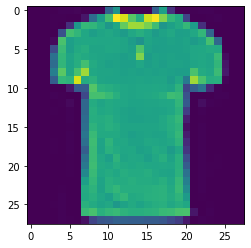

In [10]:
import random
i=random.randint(1,6000)
plt.imshow(training[i, 1:].reshape(28,28))
label=training[i,0]
label

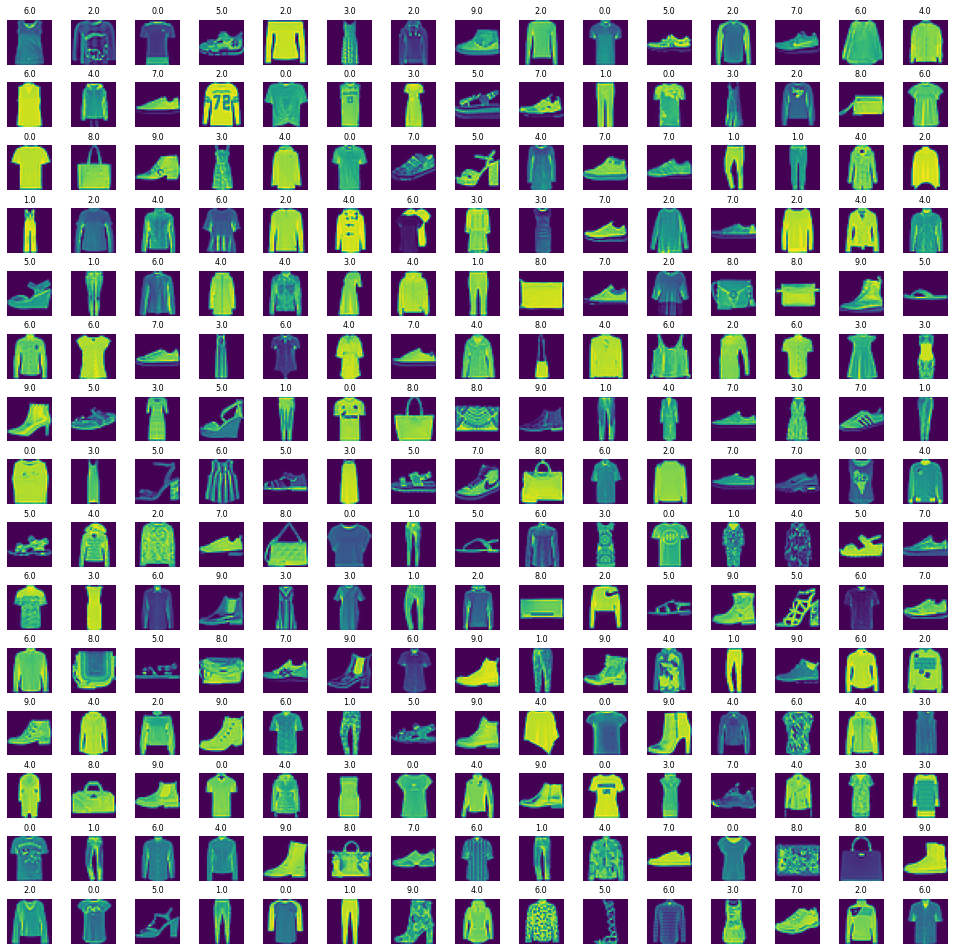

In [11]:
import numpy as np
import matplotlib.pyplot as plt

W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()


### training the model

In [12]:
x_train=training[:,1:]/255
y_train=training[:,0]

In [13]:
x_test=testing[:,1:]/255
y_test=testing[:,0]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_validate,y_train,y_validate=train_test_split(x_train,y_train,test_size=0.2,random_state=12345)

In [16]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [17]:
x_train.shape

(48000, 28, 28, 1)

In [18]:
x_test.shape

(10000, 28, 28, 1)

In [19]:
x_validate.shape

(12000, 28, 28, 1)

In [20]:
import keras

In [21]:

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model=Sequential()

In [23]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

In [24]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
cnn_model.add(Flatten())

In [32]:
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dropout(0.5))


In [34]:
cnn_model.add(Dense(units=10, activation='sigmoid'))


In [35]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

C:\Users\USER\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
epochs=50

In [38]:
cnn_model.fit(
            x_train,
            y_train,
            batch_size=512,
            epochs=epochs,  # Updated from nb_epoch to epochs
            verbose=1,  # Corrected spelling from verbase to verbose
            validation_data=(x_validate, y_validate) ) # Corrected from validation_date to validation_data



Epoch 1/50
94/94 [==============================] - 4s 24ms/step - loss: 2.0635 - accuracy: 0.2344 - val_loss: 1.6008 - val_accuracy: 0.4383
Epoch 2/50
94/94 [==============================] - 2s 19ms/step - loss: 1.5238 - accuracy: 0.4056 - val_loss: 1.1840 - val_accuracy: 0.6088
Epoch 3/50
94/94 [==============================] - 2s 19ms/step - loss: 1.2566 - accuracy: 0.5073 - val_loss: 0.9696 - val_accuracy: 0.6918
Epoch 4/50
94/94 [==============================] - 2s 19ms/step - loss: 1.0824 - accuracy: 0.5978 - val_loss: 0.8258 - val_accuracy: 0.7318
Epoch 5/50
94/94 [==============================] - 2s 18ms/step - loss: 0.9682 - accuracy: 0.6404 - val_loss: 0.7319 - val_accuracy: 0.7266
Epoch 6/50
94/94 [==============================] - 2s 19ms/step - loss: 0.9048 - accuracy: 0.6604 - val_loss: 0.6881 - val_accuracy: 0.7349
Epoch 7/50
94/94 [==============================] - 2s 19ms/step - loss: 0.8530 - accuracy: 0.6785 - val_loss: 0.6533 - val_accuracy: 0.7427
Epoch 8/50
94

# evaluating the model

In [41]:
evaluation=cnn_model.evaluate(x_test,y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))


313/313 [==============================] - 1s 4ms/step - loss: 0.3984 - accuracy: 0.8584
Test Accuracy:0.858


In [44]:
predictions = cnn_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [45]:
predictions

array([[9.99909639e-01, 8.13990773e-05, 9.11351383e-01, ...,
        3.02210879e-08, 3.10599267e-01, 6.69352130e-06],
       [2.40051634e-07, 9.99999464e-01, 1.80310934e-04, ...,
        7.67418533e-04, 8.87041388e-04, 1.48901229e-08],
       [8.32571268e-01, 1.06595655e-03, 9.93458092e-01, ...,
        1.03427865e-05, 7.21683562e-01, 2.97635980e-03],
       ...,
       [1.39246357e-03, 1.83558135e-04, 5.73817873e-04, ...,
        1.48621472e-02, 9.99994159e-01, 5.91469870e-04],
       [5.88881135e-01, 3.12046504e-05, 5.52473366e-02, ...,
        4.04947484e-03, 9.99520302e-01, 2.82106921e-02],
       [3.16816382e-04, 9.96339202e-01, 1.32966802e-01, ...,
        2.37019658e-02, 5.74406460e-02, 1.37437441e-04]], dtype=float32)

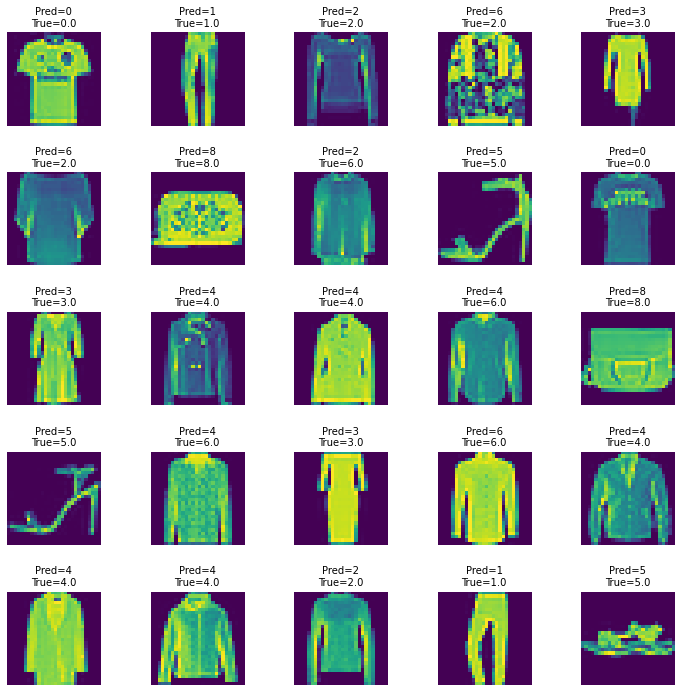

In [60]:
import numpy as np
import matplotlib.pyplot as plt

L = 5  # Number of rows
W = 5  # Number of columns
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()  # Flatten the 2D array of axes to make it easier to index

# Extract the predicted class indices from probabilities
predicted_classes = np.argmax(predictions, axis=1)

for i in range(0, L * W):
    # Display the image
    if x_test[i].ndim == 3:  # If the image has 3 dimensions (RGB)
        axes[i].imshow(x_test[i])  # Display as a color image
    else:  # If the image is grayscale
        axes[i].imshow(x_test[i].reshape(28, 28), cmap='viridis')  # Use a color map

    # Get the true class index (handle one-hot encoding if needed)
    true_class = np.argmax(y_test[i]) if y_test.ndim > 1 else y_test[i]
    
    # Set the title with predicted and true class
    axes[i].set_title(f"Pred={predicted_classes[i]}\nTrue={true_class}", fontsize=10)
    axes[i].axis('off')  # Hide the axes for a cleaner look

# Adjust subplot layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust vertical and horizontal spacing
plt.show()



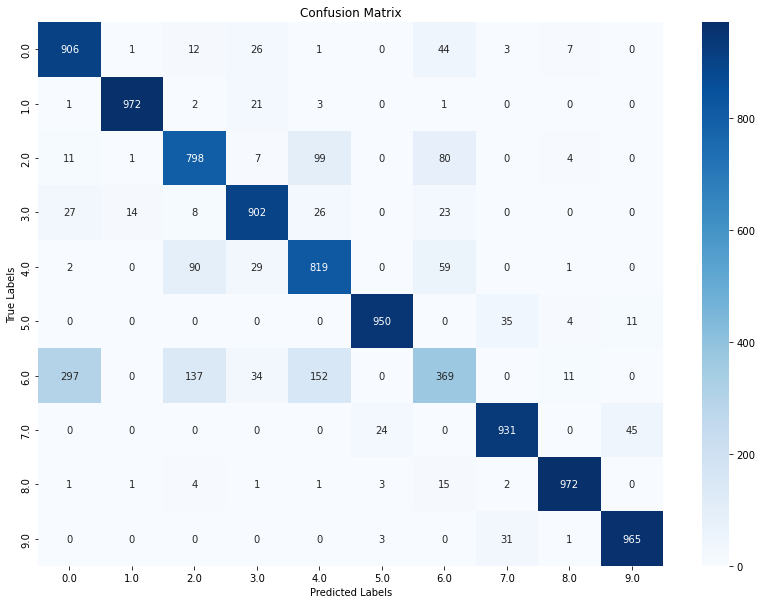

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert y_test from one-hot encoding to class labels if necessary
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Ensure predictions are class labels, not probabilities
if predictions.ndim > 1:
    predicted_labels = np.argmax(predictions, axis=1)
else:
    predicted_labels = predictions

# Compute the confusion matrix
cn = confusion_matrix(y_test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(14, 10))
sns.heatmap(cn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_labels), yticklabels=np.unique(y_test_labels))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [64]:
from sklearn.metrics import classification_report

num_classes = 10  # Define the number of classes
# Create target names for the classes
target_names = ["Class{}".format(i) for i in range(num_classes)]

# Ensure y_test and predictions are in the correct format
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

if predictions.ndim > 1:
    predicted_labels = np.argmax(predictions, axis=1)
else:
    predicted_labels = predictions

# Generate the classification report
print(classification_report(y_test_labels, predicted_labels, target_names=target_names))


              precision    recall  f1-score   support

      Class0       0.73      0.91      0.81      1000
      Class1       0.98      0.97      0.98      1000
      Class2       0.76      0.80      0.78      1000
      Class3       0.88      0.90      0.89      1000
      Class4       0.74      0.82      0.78      1000
      Class5       0.97      0.95      0.96      1000
      Class6       0.62      0.37      0.46      1000
      Class7       0.93      0.93      0.93      1000
      Class8       0.97      0.97      0.97      1000
      Class9       0.95      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000

